In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data and set NaN values to zero:
df = pd.read_csv('https://bit.ly/3E8Q1BO').fillna(0)
df.head(3)

,Bruce Springsteen,Paul McCartney,Johnny Cash,Paul Simon,Stevie Wonder,Elton John,Rod Stewart,Dolly Parton,Madonna,Neil Diamond,Billy Joel,Prince,Sting,Carly Simon,John Denver,James Taylor
0,23.0,22.0,26.0,16.0,15.0,23.0,26.0,29.0,24.0,26.0,24.0,20.0,27.0,27.0,25.0,22.0
1,24.0,22.0,26.0,21.0,17.0,24.0,27.0,31.0,25.0,26.0,25.0,20.0,29.0,28.0,28.0,22.0
2,25.0,22.0,26.0,22.0,17.0,24.0,32.0,31.0,26.0,26.0,26.0,22.0,29.0,28.0,29.0,23.0


In [3]:
# Melt the DataFrame to a long format for plotting by artist name:
melted_df = pd.melt(df, var_name='Name', value_name='Age')

# Make a column for the plotting color:
melted_df['Color'] = 'red'

# Filter out zero values:
melted_df = melted_df[melted_df['Age'] != 0]

melted_df.tail(3)

,Name,Age,Color
999,James Taylor,33.0,red
1000,James Taylor,33.0,red
1001,James Taylor,39.0,red


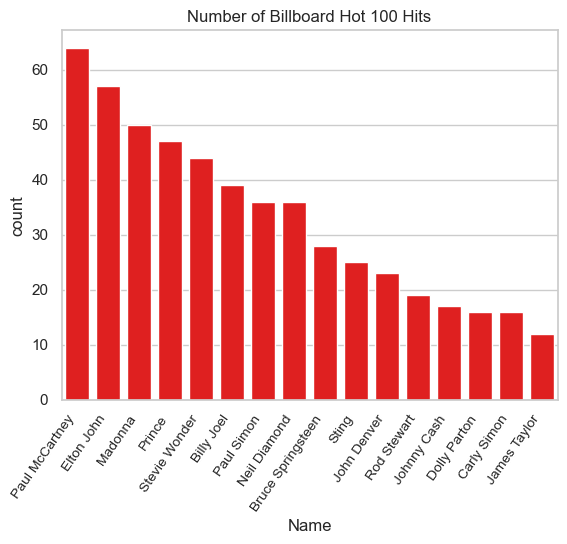

In [4]:
sns.set(style='whitegrid')

# Calculate the order of the bars by counts:
order = melted_df['Name'].value_counts().index

# Plot a bar chart of the number of hits by each artist:
ax = sns.countplot(data=melted_df, 
                   x='Name', 
                   color='red', 
                   order=order)
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation=55, 
                   fontsize=10, 
                   ha='right')
ax.set_title('Number of Billboard Hot 100 Hits');

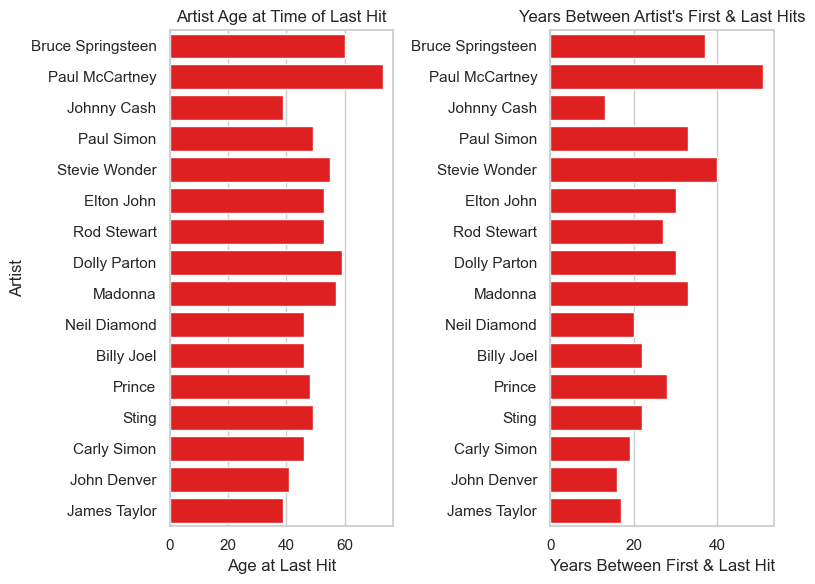

In [5]:
# Replace 0 values with NaN in order to find minimum age statistic:
df = df.replace(0, np.NaN)

# Calculate maximum age for each column
max_age = df.max()

# Calculate age span (maximum age - minimum age) for each column
age_span =df.max() - df.min()

# Create subplots for two bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, 
                         figsize=(8, 6))

# Plot artist's age at time of last hit:
sns.barplot(x=max_age.values, 
            y=max_age.index, 
            ax=axes[0], 
            color='red', 
            orient='h')
axes[0].set_title('Artist Age at Time of Last Hit')
axes[0].set_xlabel('Age at Last Hit')
axes[0].set_ylabel('Artist')

# Plot age span between hits:
sns.barplot(x=age_span.values, 
            y=age_span.index, 
            ax=axes[1], 
            color='red', 
            orient='h')
axes[1].set_title("Years Between Artist's First & Last Hits")
axes[1].set_xlabel('Years Between First & Last Hit')
axes[1].set_ylabel('')

plt.tight_layout();

In [6]:
# Calculate the statistics:
mean_age = round(melted_df.mean(numeric_only=True).mean(), 1)
median_age = round(melted_df.median(numeric_only=True).median(), 1)
mode_age = round(melted_df.mode(numeric_only=True).mode(), 1)

print(f"Mean age = {mean_age}")
print(f"Median age = {median_age}")
print(f"Mode age = {mode_age}")

Mean age = 33.6
Median age = 32.0
Mode age =     Age
0  29.0
1  31.0


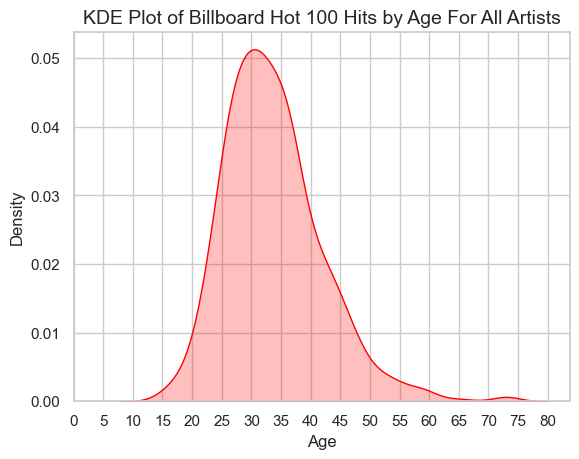

In [7]:
# Create a KDE plot for complete dataset:
ax = sns.kdeplot(data=melted_df, 
                 x='Age', 
                 hue='Color', 
                 fill=True, 
                 palette='dark:red_r', 
                 legend=False)

# Set x-axis tick positions:
ax.set_xticks(range(0, 85, 5))  

ax.set_title('KDE Plot of Billboard Hot 100 Hits by Age For All Artists',
             fontsize=14);

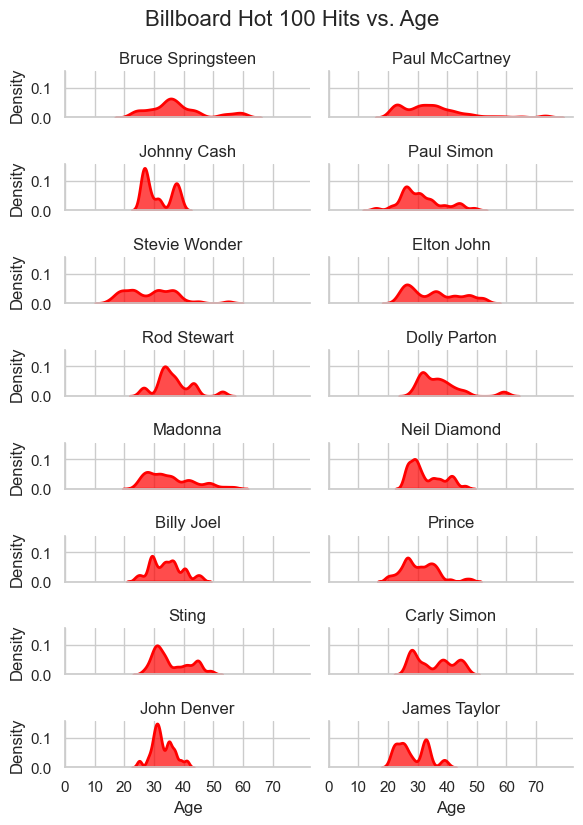

In [8]:
# Plot a Facet Grid of each artist's hits vs. age as a KDE chart:
g = sns.FacetGrid(data=melted_df, 
                  col='Name', 
                  hue='Color', 
                  aspect=3, 
                  height=1.00, 
                  col_wrap=2, 
                  palette='dark:red_r')

g.map(sns.kdeplot, 'Age',
      fill=True, 
      alpha=0.7, 
      lw=2, 
      bw_adjust=0.4)

g.set_axis_labels('Age', 'Density')
g.set_titles(col_template='{col_name}')
g.tight_layout()

# Loop through each subplot to set custom x-axis tick labels:
for ax in g.axes.flat:
    ax.set_xticks(range(0, 80, 10))
    ax.set_xticklabels(range(0, 80, 10))

# Add a title to the FacetGrid
g.fig.suptitle('Billboard Hot 100 Hits vs. Age', 
               y=1.03,
               fontsize=16);

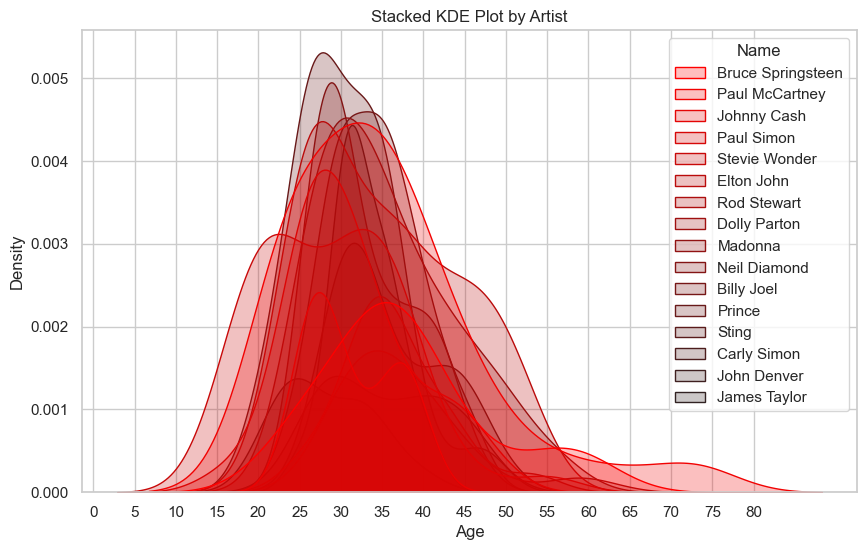

In [9]:
# Create a stacked KDE plot:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.kdeplot(data=melted_df, 
                 x='Age', 
                 hue='Name', 
                 fill=True, 
                 palette='dark:red_r', 
                 common_norm=True)
ax.set_xticks(range(0, 85, 5))
ax.set_title('Stacked KDE Plot by Artist')
ax.set_xlabel('Age')
ax.set_ylabel('Density');

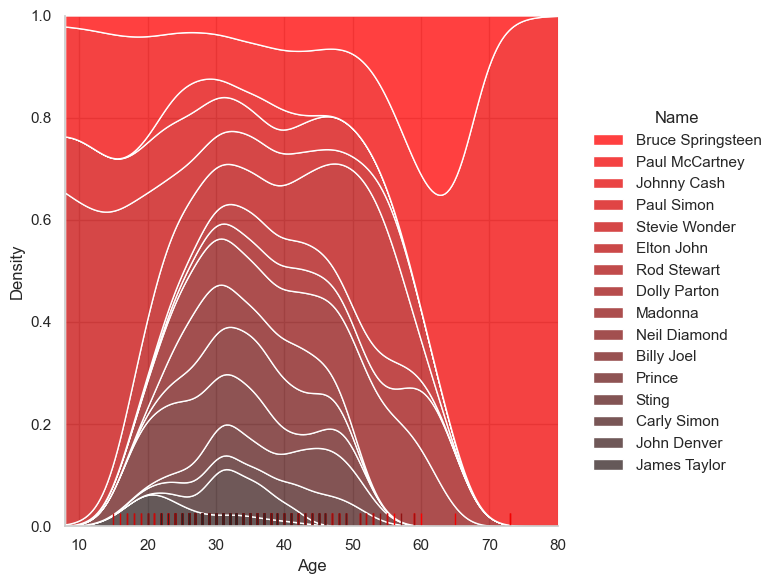

In [10]:
# Plot the distribution of hits vs age:
sns.displot(data=melted_df,
            x='Age', hue='Name',
            kind='kde', height=6,
            multiple='fill', clip=(0, None),
            palette='dark:red_r', 
            common_norm=True, rug=True);